# Indonesia Country

In [1]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
menhap_df = pd.read_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/final_data.xlsx")
menhap_df

,country,year,Schizophrenia,Bipolar,Eating_Disorders,Anxiety,Drug_Use,Depression,Alcohol_Use,Life_Ladder,Log_GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Positive_Affect,Negative_Affect,Ladder_Std_Dev,GINI_Index
0,Brunei,1990,0.274544,0.617719,0.550731,3.548453,0.911231,2.577977,0.771017,6.233732,10.826301,0.790585,70.994705,0.767580,0.073472,0.062403,0.569497,0.166263,2.052102,0.622453
1,Brunei,1991,0.273819,0.618347,0.548010,3.554565,0.910156,2.562828,0.770862,6.437663,11.145486,0.793567,73.141360,0.789073,0.054550,0.226984,0.550824,0.112444,2.006036,0.584078
2,Brunei,1992,0.273212,0.618986,0.545544,3.561621,0.910287,2.551382,0.770430,6.586561,10.776199,0.823234,73.563922,0.787172,0.043634,0.148619,0.712836,0.185052,2.053332,0.560275
3,Brunei,1993,0.272736,0.619673,0.543644,3.569155,0.910409,2.543804,0.769584,6.821280,11.119712,0.811811,71.970894,0.801130,0.071169,0.054491,0.472039,0.127140,2.031076,0.612157
4,Brunei,1994,0.272383,0.620342,0.542626,3.576319,0.908915,2.538465,0.768343,6.192638,10.400065,0.752147,73.270498,0.705897,0.086336,0.107812,0.650715,0.138546,2.073008,0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vietnam,2013,0.241026,0.550479,0.119353,2.039645,0.673579,2.884934,1.722689,5.022699,8.541249,0.759477,65.545815,0.919607,-0.024637,0.771246,0.718431,0.165225,1.404304,0.381849
304,Vietnam,2014,0.241883,0.551005,0.121583,2.045305,0.677829,2.882767,1.728448,5.084923,8.588622,0.792168,65.677925,0.845240,0.002126,0.779896,0.701386,0.240607,1.769163,0.414816
305,Vietnam,2015,0.242783,0.551548,0.123609,2.051937,0.682933,2.881750,1.733233,5.076315,8.642591,0.848677,65.810028,0.897333,0.087220,0.747188,0.642237,0.232416,1.794858,0.398138
306,Vietnam,2016,0.243709,0.552084,0.126256,2.059037,0.687896,2.879813,1.736929,5.062267,8.692120,0.876324,65.942139,0.894351,-0.088430,0.799240,0.536226,0.222550,1.767819,0.375812


In [3]:
menhap_df.dtypes

country                object
year                    int64
Schizophrenia         float64
Bipolar               float64
Eating_Disorders      float64
Anxiety               float64
Drug_Use              float64
Depression            float64
Alcohol_Use           float64
Life_Ladder           float64
Log_GDP_per_Capita    float64
Social_Support        float64
Life_Expectancy       float64
Freedom               float64
Generosity            float64
Corruption            float64
Positive_Affect       float64
Negative_Affect       float64
Ladder_Std_Dev        float64
GINI_Index            float64
dtype: object

In [4]:
lifeladder_df = menhap_df.loc[:, ["year", 'country', 'Life_Ladder']]
lifeladder_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
...,...,...,...
303,2013,Vietnam,5.022699
304,2014,Vietnam,5.084923
305,2015,Vietnam,5.076315
306,2016,Vietnam,5.062267


In [5]:
# Mengambil data untuk country tertentu
data_df = lifeladder_df.loc[lifeladder_df['country'] == 'Indonesia']
data_df['year'] = pd.to_datetime(data_df['year'], format='%Y')
data_df = pd.Series(data_df['Life_Ladder'].values, index=data_df.year, name='Life_Ladder')
data_df.index = pd.DatetimeIndex(data_df.index, 
                                      freq=data_df.index.inferred_freq)

data_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8336\1723896014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['year'] = pd.to_datetime(data_df['year'], format='%Y')


year
1990-01-01    5.043702
1991-01-01    5.091739
1992-01-01    5.018967
1993-01-01    5.154841
1994-01-01    5.472880
1995-01-01    5.369442
1996-01-01    5.188945
1997-01-01    5.496856
1998-01-01    5.061878
1999-01-01    5.559570
2000-01-01    5.595616
2001-01-01    5.516733
2002-01-01    5.256236
2003-01-01    5.126034
2004-01-01    5.536656
2005-01-01    5.352292
2006-01-01    4.946978
2007-01-01    5.101214
2008-01-01    4.815310
2009-01-01    5.472361
2010-01-01    5.457299
2011-01-01    5.172608
2012-01-01    5.367774
2013-01-01    5.292238
2014-01-01    5.597375
2015-01-01    5.042800
2016-01-01    5.136325
2017-01-01    5.480494
Freq: AS-JAN, Name: Life_Ladder, dtype: float64

In [6]:
data_list = data_df.tolist()
data_list

[5.04370200751086,
 5.091739232165016,
 5.018966832851864,
 5.154841359959978,
 5.472880233646809,
 5.369442027740553,
 5.188945064838464,
 5.496856191667748,
 5.06187769983063,
 5.559569967495738,
 5.595615562826746,
 5.516732687858299,
 5.256236156417581,
 5.126033713023356,
 5.536656026791474,
 5.352292164360541,
 4.946978092193604,
 5.101213932037354,
 4.815309524536133,
 5.472361087799072,
 5.45729923248291,
 5.172608375549316,
 5.36777400970459,
 5.292237758636475,
 5.597375392913818,
 5.042799949645996,
 5.136325359344482,
 5.480494237244816]

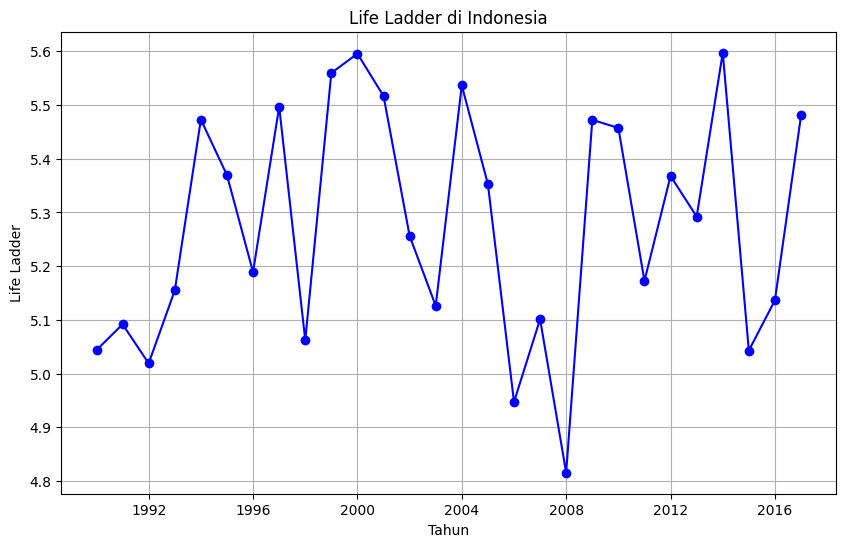

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(data_df.index, data_list, marker='o', linestyle='-', color='b')
plt.title('Life Ladder di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

### model SES

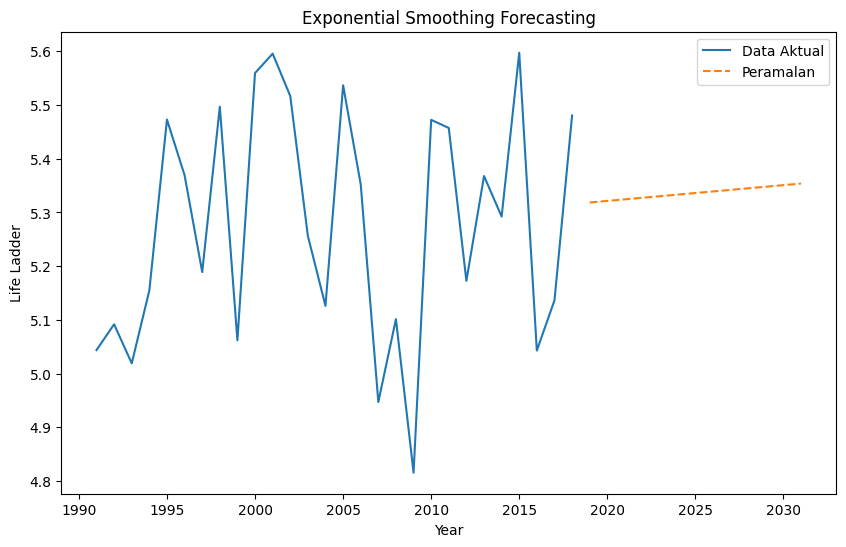

            forecast
2018-12-31  5.318500
2019-12-31  5.321438
2020-12-31  5.324376
2021-12-31  5.327315
2022-12-31  5.330253
2023-12-31  5.333191
2024-12-31  5.336129
2025-12-31  5.339067
2026-12-31  5.342005
2027-12-31  5.344943
2028-12-31  5.347881
2029-12-31  5.350819
2030-12-31  5.353757


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Buat model Exponential Smoothing
model = ExponentialSmoothing(life_ladder_series, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Buat prediksi untuk beberapa tahun ke depan
forecast_steps = 13
forecast = fit.forecast(steps=forecast_steps)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(forecast, label='Peramalan', linestyle='--')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
forecast_years = pd.date_range(start=years[-1] + pd.offsets.YearBegin(), periods=forecast_steps, freq='Y')
forecast_df = pd.DataFrame({'forecast': forecast})

print(forecast_df)


### Moving Average

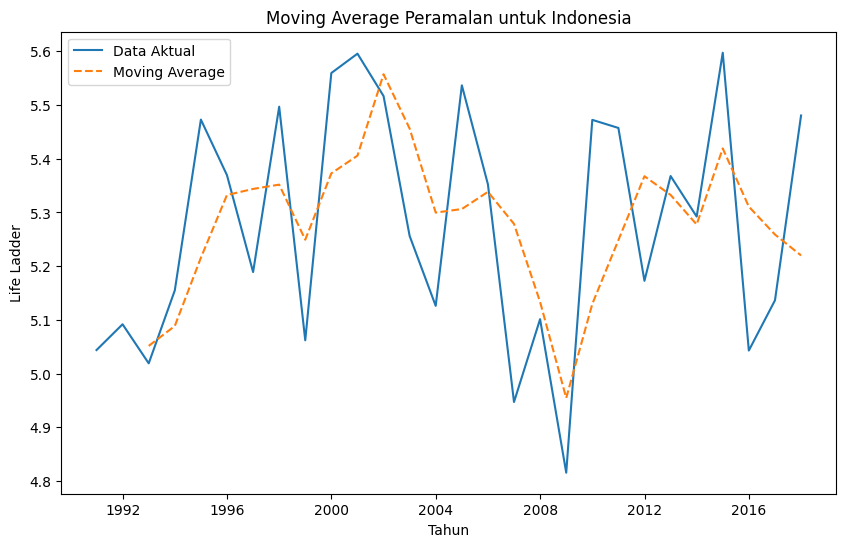

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 3
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

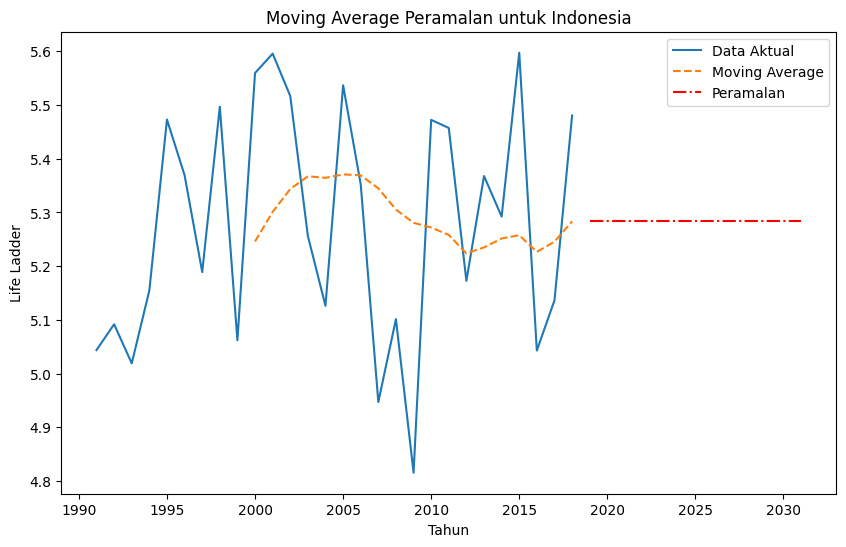

            forecast
year                
2018-12-31  5.283458
2019-12-31  5.283458
2020-12-31  5.283458
2021-12-31  5.283458
2022-12-31  5.283458
2023-12-31  5.283458
2024-12-31  5.283458
2025-12-31  5.283458
2026-12-31  5.283458
2027-12-31  5.283458
2028-12-31  5.283458
2029-12-31  5.283458
2030-12-31  5.283458


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 10 tahun)
window_size = 10
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Prediksi 10 tahun ke depan
last_moving_avg = moving_average.iloc[-1]
forecast_years = pd.date_range(start=life_ladder_series.index[-1] + pd.DateOffset(years=1), periods=13, freq='Y')
forecast_values = np.full(13, last_moving_avg)

# Buat DataFrame untuk prediksi
forecast_ma = pd.DataFrame({'year': forecast_years, 'forecast': forecast_values})
forecast_ma.set_index('year', inplace=True)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.plot(forecast_ma, label='Peramalan', linestyle='-.', color='red')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
print(forecast_ma)

### linear regresion

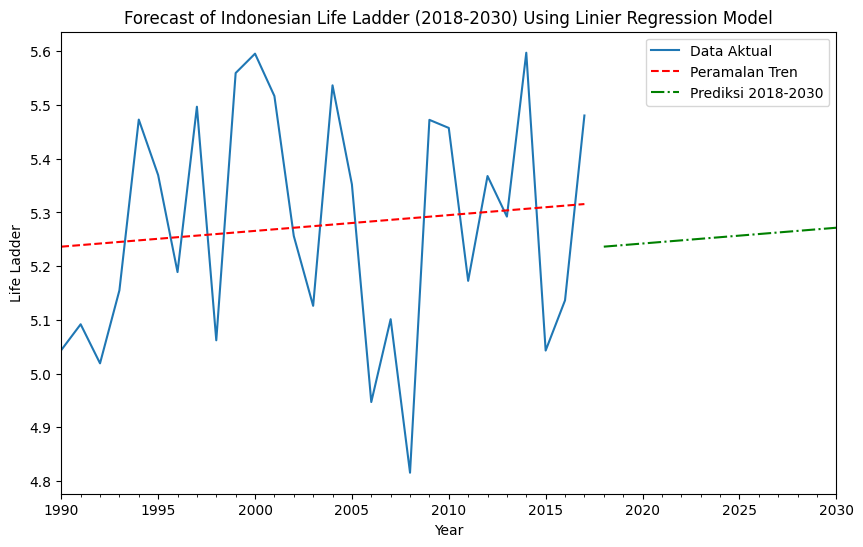

2018-12-31    5.236235
2019-12-31    5.239173
2020-12-31    5.242111
2021-12-31    5.245049
2022-12-31    5.247987
2023-12-31    5.250925
2024-12-31    5.253863
2025-12-31    5.256801
2026-12-31    5.259739
2027-12-31    5.262677
2028-12-31    5.265615
2029-12-31    5.268554
2030-12-31    5.271492
Freq: A-DEC, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import tsatools

# Membuat data Life Ladder dari daftar yang ada
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years, name='Life_Ladder')

# Menambahkan tren
data_df = tsatools.add_trend(life_ladder_series, trend='ct')

# Membangun model regresi linear
data_lm = sm.OLS(data_df['Life_Ladder'], data_df[['trend', 'const']]).fit()

# Membuat data untuk prediksi dari 2018 sampai 2030
forecast_years = pd.date_range(start='2018', end='2031', freq='Y')
forecast_df = pd.DataFrame(index=forecast_years)
forecast_df = tsatools.add_trend(forecast_df, trend='ct')

# Membuat prediksi
forecast_values = data_lm.predict(forecast_df[['trend', 'const']])

# Plot hasil
plt.figure(figsize=(10, 6))
ax = life_ladder_series.plot(title='Forecast of Indonesian Life Ladder (2018-2030) Using Linier Regression Model')
data_lm.predict(data_df[['trend', 'const']]).plot(ax=ax, linestyle='--', color='red')
forecast_values.plot(ax=ax, linestyle='-.', color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
plt.legend(['Data Aktual', 'Peramalan Tren', 'Prediksi 2018-2030'])
plt.show()

# Menampilkan prediksi
print(forecast_values)

forecast_values.to_excel("D:\PENS\Semester_4\Data Mining\PBL_Datamining\hasil_forecast\indonesia_for_lr.xlsx", index=False)


In [12]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [13]:
# Mengambil data untuk country tertentu
brunei_df = lifeladder_df.loc[lifeladder_df['country'] == 'Brunei']
brunei_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
5,1995,Brunei,6.348373
6,1996,Brunei,6.734922
7,1997,Brunei,6.597460
8,1998,Brunei,6.598677
9,1999,Brunei,6.680745


### ARIMA

Forecast for Indonesia's Life Ladder (2018-2030):
            forecast
2018-12-31  5.299207
2019-12-31  5.278455
2020-12-31  5.276080
2021-12-31  5.275808
2022-12-31  5.275776
2023-12-31  5.275773
2024-12-31  5.275772
2025-12-31  5.275772
2026-12-31  5.275772
2027-12-31  5.275772
2028-12-31  5.275772
2029-12-31  5.275772
2030-12-31  5.275772


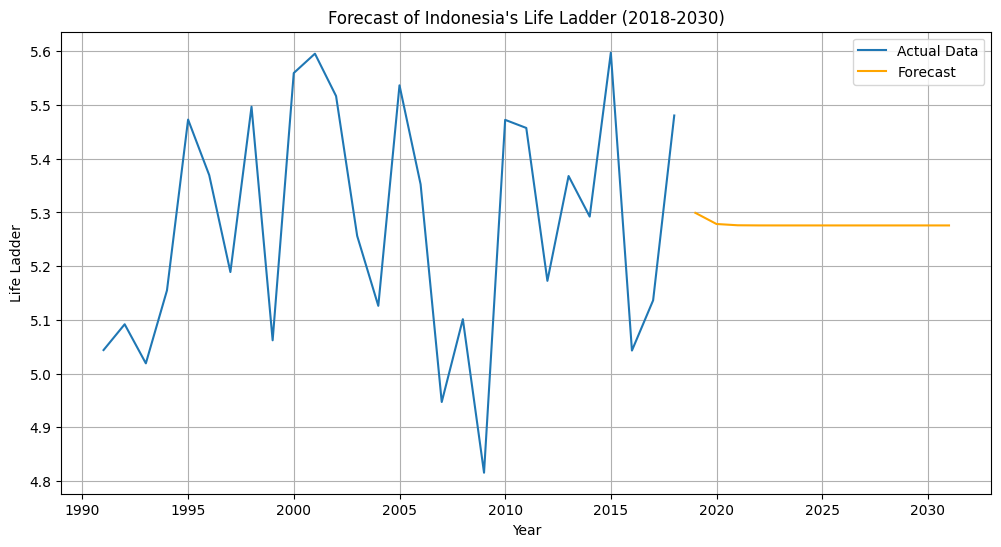

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Konversi life_ladder_list menjadi Series dengan index tahun
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Misalkan model ARIMA yang sudah kita latih sebelumnya adalah ARIMA(1,1,1)
model = ARIMA(life_ladder_series, order=(1, 1, 1))
model_fit = model.fit()

# Melakukan peramalan untuk 14 tahun ke depan (dari tahun 2018 hingga 2030)
forecast = model_fit.forecast(steps=13)

# Tampilkan hasil peramalan
print("Forecast for Indonesia's Life Ladder (2018-2030):")
forecast_years = pd.date_range(start='2018-01-01', periods=13, freq='Y')
forecast_arima = pd.DataFrame({'forecast': forecast})
print(forecast_arima)

# Visualisasikan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(life_ladder_series, label='Actual Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Forecast of Indonesia's Life Ladder (2018-2030)")
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid(True)
plt.show()


## Evaluation Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Buat DataFrame baru dengan life_ladder_list dan tahun sebagai indeks
data_df_new = pd.DataFrame({'Life_Ladder': data_list}, index=years)

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = data_df_new.index.year.values.reshape(-1, 1)  # Ambil tahun dari indeks DataFrame
y = data_df_new['Life_Ladder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
forecast_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, forecast_lr)
mape_lr = np.mean(np.abs((y_test - forecast_lr) / y_test)) * 100
rmse_lr = np.sqrt(mean_squared_error(y_test, forecast_lr))


In [16]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = life_ladder_series.index.to_numpy().reshape(-1, 1)  # Menggunakan tahun sebagai fitur
y = life_ladder_series.values  # Life Ladder sebagai target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model SES
model_ses = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit_ses = model_ses.fit()
forecast_ses = fit_ses.forecast(steps=len(X_test))
mae_ses = mean_absolute_error(y_test, forecast_ses)
mape_ses = np.mean(np.abs((y_test - forecast_ses) / y_test)) * 100
rmse_ses = np.sqrt(mean_squared_error(y_test, forecast_ses))

# Model ARIMA
model_arima = ARIMA(y_train, order=(1, 1, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(X_test))
mae_arima = mean_absolute_error(y_test, forecast_arima)
mape_arima = np.mean(np.abs((y_test - forecast_arima) / y_test)) * 100
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))

# Model MA
window_size = 3
data_df['Moving Average'] = data_df['Life_Ladder'].rolling(window=window_size, min_periods=1).mean()
actual_data = data_df['Life_Ladder']
ma_forecast = data_df['Moving Average']
mae_ma = mean_absolute_error(actual_data, ma_forecast)
mape_ma = np.mean(np.abs((actual_data - ma_forecast) / actual_data)) * 100
rmse_ma = np.sqrt(mean_squared_error(actual_data, ma_forecast))


In [17]:
print(forecast_lr)
print(forecast_ses)
print(forecast_arima)
print(ma_forecast.tail(20))

[5.27429435 5.35059804 5.26952537 5.33152212 5.23137353 5.28860129
 5.3124462  5.3362911  5.28383231]
[5.45027206 5.46581083 5.48134961 5.49688838 5.51242715 5.52796593
 5.5435047  5.55904348 5.57458225]
[5.44892675 5.38877673 5.40269319 5.39947344 5.40021837 5.40004602
 5.4000859  5.40007667 5.40007881]
1998-12-31    5.249226
1999-12-31    5.372768
2000-12-31    5.405688
2001-12-31    5.557306
2002-12-31    5.456195
2003-12-31    5.299668
2004-12-31    5.306309
2005-12-31    5.338327
2006-12-31    5.278642
2007-12-31    5.133495
2008-12-31    4.954501
2009-12-31    5.129628
2010-12-31    5.248323
2011-12-31    5.367423
2012-12-31    5.332561
2013-12-31    5.277540
2014-12-31    5.419129
2015-12-31    5.310804
2016-12-31    5.258834
2017-12-31    5.219873
Freq: A-DEC, Name: Moving Average, dtype: float64


In [18]:
# Buat DataFrame untuk menyimpan hasil evaluasi
eval_metrics = pd.DataFrame({
    'Model': ['SES','Linier Regresion', 'Moving Average', 'ARIMA'],
    'MAE': [mae_ses,mae_lr, mae_ma, mae_arima],
    'MAPE (%)': [mape_ses, mape_lr, mape_ma, mape_arima],
    'RMSE': [rmse_ses, rmse_lr, rmse_ma, rmse_arima]
})

# Tampilkan DataFrame evaluasi
print("Evaluation Metrics:")
print(eval_metrics)

Evaluation Metrics:
              Model       MAE  MAPE (%)      RMSE
0               SES  0.300881  5.850619  0.333515
1  Linier Regresion  0.183921  3.521675  0.205646
2    Moving Average  0.145309  2.745873  0.175990
3             ARIMA  0.219162  4.261059  0.247504


In [19]:
print(data_list)

[5.04370200751086, 5.091739232165016, 5.018966832851864, 5.154841359959978, 5.472880233646809, 5.369442027740553, 5.188945064838464, 5.496856191667748, 5.06187769983063, 5.559569967495738, 5.595615562826746, 5.516732687858299, 5.256236156417581, 5.126033713023356, 5.536656026791474, 5.352292164360541, 4.946978092193604, 5.101213932037354, 4.815309524536133, 5.472361087799072, 5.45729923248291, 5.172608375549316, 5.36777400970459, 5.292237758636475, 5.597375392913818, 5.042799949645996, 5.136325359344482, 5.480494237244816]


In [20]:

# Data aktual dan prediksi dari masing-masing model
actual_values = [5.472361087799072, 5.45729923248291, 5.172608375549316, 5.36777400970459, 5.292237758636475, 5.597375392913818, 5.042799949645996, 5.136325359344482, 5.480494237244816]
ses_forecast = [5.45027207, 5.46581084, 5.48134962, 5.49688839, 5.51242717, 5.52796594, 5.54350472, 5.55904349, 5.57458227]
ma_forecast = [5.129628, 5.248323, 5.367423, 5.332561, 5.277540, 5.419129, 5.310804, 5.258834, 5.219873]
lr_forecast = [5.27429435, 5.35059804, 5.26952537, 5.33152212, 5.23137353, 5.28860129, 5.3124462 , 5.3362911 , 5.28383231]
arima_forecast = [5.44892391, 5.38877725, 5.40269231, 5.39947303, 5.40021782, 5.40004551, 5.40008537, 5.40007615, 5.40007828]

# Tanggal mulai dan akhir
start_date = '2009-01-01'
end_date = '2018-01-01'

# Buat range tanggal dari start_date hingga end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')

# Buat DataFrame untuk tabel prediksi dengan kolom tahun
predictions_table = pd.DataFrame({
    'Year': date_range,
    'Actual': actual_values,
    'SES Forecast': forecast_ses,
    'Linier Regresion Forecast' : forecast_lr,
    'MA Forecast': ma_forecast,
    'ARIMA Forecast': forecast_arima
})
# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
predictions_table

Hasil Prediksi:


,Year,Actual,SES Forecast,Linier Regresion Forecast,MA Forecast,ARIMA Forecast
0,2009-12-31,5.472361,5.450272,5.274294,5.129628,5.448927
1,2010-12-31,5.457299,5.465811,5.350598,5.248323,5.388777
2,2011-12-31,5.172608,5.481350,5.269525,5.367423,5.402693
3,2012-12-31,5.367774,5.496888,5.331522,5.332561,5.399473
4,2013-12-31,5.292238,5.512427,5.231374,5.277540,5.400218
5,2014-12-31,5.597375,5.527966,5.288601,5.419129,5.400046
6,2015-12-31,5.042800,5.543505,5.312446,5.310804,5.400086
7,2016-12-31,5.136325,5.559043,5.336291,5.258834,5.400077
8,2017-12-31,5.480494,5.574582,5.283832,5.219873,5.400079
